## HW1: Linear Regression using Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # for plotting figure
sns.set_theme(style="whitegrid")


In [2]:
np.random.seed(9534)


## Load train data

In [3]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']


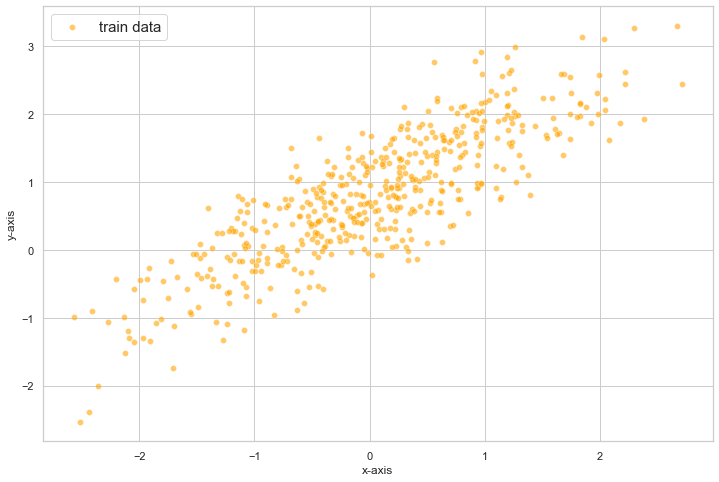

In [4]:
# plot train data distribution
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=x_train, y=y_train, color='orange',
    alpha=0.6, label='train data')
plt.legend(fontsize=15)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()


## Train model

In [5]:
def mean_square_error(y_true, y_pred):
    n = len(y_true)
    error = sum((y_true-y_pred) ** 2) / n
    return error


In [6]:
def linear_regression(x, y, learning_rate, iteration):
    n = len(x)  # n observations
    scale = np.std(x, ddof=1)  # standard deviation (ddof=1, sample std)
    # initialize the weights
    slope = np.random.normal(0, scale)  # beta1
    intercept = np.random.normal(0, scale)  # beta0
    print('[initial weights]')
    print('slope:\t\t{}\nintercept:\t{}'.format(slope, intercept))
    # run iteration
    loss = []  # store each iteration loss
    for i in range(iteration):
        # prediction of this iteration
        y_pred = slope*x + intercept
        # calculate MSE of each iteration
        loss.append(mean_square_error(y, y_pred))
        # calculate partial derivatives of the MSE function
        d_w = (-2/n) * sum(x * (y-y_pred))  # partial derivative wrt slope
        d_i = (-2/n) * sum(y-y_pred)  # partial derivative wrt intercept
        # update slope and intercept with the learning rate
        slope -= learning_rate * d_w
        intercept -= learning_rate * d_i

    print('[result weights]')
    print('slope:\t\t{}\nintercept:\t{}'.format(slope, intercept))

    return slope, intercept, loss


In [7]:
learning_rate = 0.001
iteration = 3000
# train for the weights
slope, intercept, loss = linear_regression(
    x_train, y_train, learning_rate, iteration)


[initial weights]
slope:		2.3313804369343325
intercept:	0.9811302170718237
[result weights]
slope:		0.8222159931418311
intercept:	0.7845449821823192


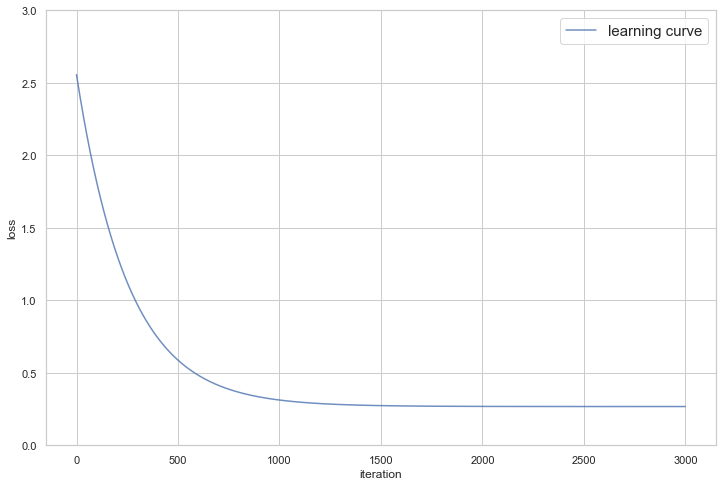

In [8]:
# plot learning curve
plt.figure(figsize=(12, 8))
sns.lineplot(
    x=np.arange(iteration), y=loss,
    alpha=0.8, label='learning curve')
plt.legend(fontsize=15)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.yticks(np.arange(0, max(loss) + 0.5, 0.5))
plt.show()


## Test the performance on the testing data

In [9]:
def prediction_model(x, slope, intercept):
    return slope*x + intercept


In [10]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']


In [11]:
y_pred = prediction_model(x_test, slope, intercept)


In [12]:
mse = mean_square_error(y_test, y_pred)
print('MSE:', mse)


MSE: 0.06818206472106299


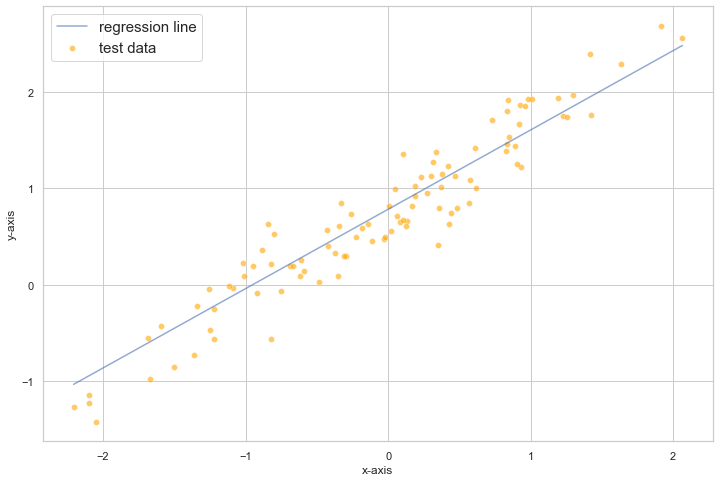

In [13]:
# plot test data and the result regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=x_test, y=y_test, color='orange',
    alpha=0.6, label='test data')
sns.lineplot(x=x_test, y=y_pred, alpha=0.6, label='regression line')
plt.legend(fontsize=15)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()
